In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [2]:
data = pd.read_csv('image_bins_stats.csv')
data.shape

(24000, 98)

In [3]:
data.head()

,filename,rmean_bins0,rmean_bins1,rmean_bins2,rmean_bins3,rmean_bins4,rmean_bins5,rmean_bins6,rmean_bins7,rstd_bins0,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,clean_p_1.jpg,1.485688,116.416667,0.0,0.0,0.000000,128.758621,0.0,159.770015,11.472993,...,7.358843,47.621590,3.092351,0.0,0.0,0.000000,8.421707,0.0,9.181035,1
1,clean_p_2.jpg,0.191129,91.000000,0.0,0.0,0.000000,122.485714,0.0,149.839854,0.626280,...,8.430080,7.154429,0.840896,0.0,0.0,0.000000,15.029039,0.0,10.516990,1
2,clean_p_3.jpg,1.218065,115.000000,0.0,0.0,121.730769,135.517857,0.0,154.189458,10.132966,...,7.949709,43.394240,0.420448,0.0,0.0,7.701832,13.599319,0.0,10.354453,1
3,clean_p_4.jpg,0.148524,98.000000,0.0,0.0,0.000000,129.906667,0.0,157.583812,0.573290,...,8.987692,6.601182,2.619225,0.0,0.0,0.000000,12.787280,0.0,10.943418,1
4,clean_p_5.jpg,0.183128,0.000000,0.0,0.0,0.000000,0.000000,0.0,158.600042,0.602004,...,7.204324,6.869720,0.000000,0.0,0.0,0.000000,0.000000,0.0,8.924785,1


In [4]:
data = data.drop(['filename'], axis=1)
data.head()

,rmean_bins0,rmean_bins1,rmean_bins2,rmean_bins3,rmean_bins4,rmean_bins5,rmean_bins6,rmean_bins7,rstd_bins0,rstd_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,1.485688,116.416667,0.0,0.0,0.000000,128.758621,0.0,159.770015,11.472993,1.943118,...,7.358843,47.621590,3.092351,0.0,0.0,0.000000,8.421707,0.0,9.181035,1
1,0.191129,91.000000,0.0,0.0,0.000000,122.485714,0.0,149.839854,0.626280,0.000000,...,8.430080,7.154429,0.840896,0.0,0.0,0.000000,15.029039,0.0,10.516990,1
2,1.218065,115.000000,0.0,0.0,121.730769,135.517857,0.0,154.189458,10.132966,0.000000,...,7.949709,43.394240,0.420448,0.0,0.0,7.701832,13.599319,0.0,10.354453,1
3,0.148524,98.000000,0.0,0.0,0.000000,129.906667,0.0,157.583812,0.573290,2.000000,...,8.987692,6.601182,2.619225,0.0,0.0,0.000000,12.787280,0.0,10.943418,1
4,0.183128,0.000000,0.0,0.0,0.000000,0.000000,0.0,158.600042,0.602004,0.000000,...,7.204324,6.869720,0.000000,0.0,0.0,0.000000,0.000000,0.0,8.924785,1


In [5]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,rmean_bins0,rmean_bins1,rmean_bins2,rmean_bins3,rmean_bins4,rmean_bins5,rmean_bins6,rmean_bins7,rstd_bins0,rstd_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,1.485688,116.416667,0.0,0.0,0.000000,128.758621,0.000000,159.770015,11.472993,1.943118,...,7.358843,47.621590,3.092351,0.0,0.0,0.000000,8.421707,0.000000,9.181035,1.0
1,0.191129,91.000000,0.0,0.0,0.000000,122.485714,0.000000,149.839854,0.626280,0.000000,...,8.430080,7.154429,0.840896,0.0,0.0,0.000000,15.029039,0.000000,10.516990,1.0
2,1.218065,115.000000,0.0,0.0,121.730769,135.517857,0.000000,154.189458,10.132966,0.000000,...,7.949709,43.394240,0.420448,0.0,0.0,7.701832,13.599319,0.000000,10.354453,1.0
3,0.148524,98.000000,0.0,0.0,0.000000,129.906667,0.000000,157.583812,0.573290,2.000000,...,8.987692,6.601182,2.619225,0.0,0.0,0.000000,12.787280,0.000000,10.943418,1.0
4,0.183128,0.000000,0.0,0.0,0.000000,0.000000,0.000000,158.600042,0.602004,0.000000,...,7.204324,6.869720,0.000000,0.0,0.0,0.000000,0.000000,0.000000,8.924785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,0.167535,0.000000,0.0,0.0,0.000000,0.000000,0.000000,145.580835,0.587364,0.000000,...,6.817875,7.277478,0.000000,0.0,0.0,0.000000,0.000000,0.000000,11.111529,0.0
23995,0.182460,0.000000,0.0,0.0,0.000000,0.000000,0.000000,142.290042,0.590877,0.000000,...,5.262551,8.170191,0.000000,0.0,0.0,0.000000,0.000000,0.000000,10.111068,0.0
23996,0.222222,0.000000,0.0,0.0,0.000000,0.000000,0.000000,145.978772,0.689536,0.000000,...,5.407731,7.859719,0.000000,0.0,0.0,0.000000,0.000000,0.000000,9.734824,0.0
23997,0.217425,0.000000,0.0,0.0,0.000000,0.000000,0.000000,145.915418,0.665380,0.000000,...,5.073114,7.887594,0.000000,0.0,0.0,0.000000,0.000000,0.000000,9.672132,0.0


In [6]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((16799, 96), (7200, 96))

In [7]:
# determine roc-auc for each feature

# here we store the roc-auc values
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values[0:10]

[0.5560201519965668,
 0.6707397386960453,
 0.5058545402378194,
 0.5043554260394423,
 0.7458311915303212,
 0.9313870495085048,
 0.5338828670601488,
 0.5200113533244551,
 0.6343497949078117,
 0.6400790874186691]

Text(0, 0.5, 'roc-auc')

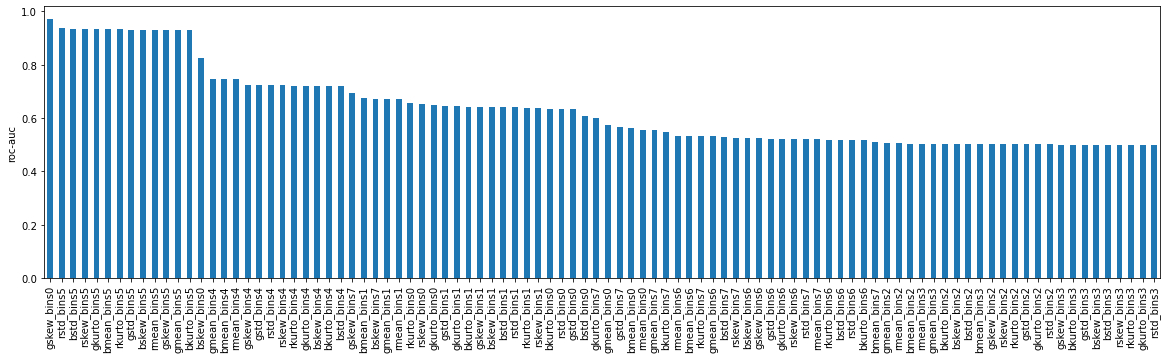

In [8]:
# now let's:

# 1) capture the roc-auc values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the roc-auc
# 4) and make a var plot

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [9]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.6])

47

In [10]:
selected_features = roc_values[roc_values > 0.6].index

selected_features

Index(['rmean_bins1', 'rmean_bins4', 'rmean_bins5', 'rstd_bins0', 'rstd_bins1',
       'rstd_bins4', 'rstd_bins5', 'rskew_bins0', 'rskew_bins1', 'rskew_bins4',
       'rskew_bins5', 'rkurto_bins0', 'rkurto_bins1', 'rkurto_bins4',
       'rkurto_bins5', 'gmean_bins1', 'gmean_bins4', 'gmean_bins5',
       'gstd_bins0', 'gstd_bins1', 'gstd_bins4', 'gstd_bins5', 'gskew_bins0',
       'gskew_bins1', 'gskew_bins4', 'gskew_bins5', 'gskew_bins7',
       'gkurto_bins0', 'gkurto_bins1', 'gkurto_bins4', 'gkurto_bins5',
       'bmean_bins1', 'bmean_bins4', 'bmean_bins5', 'bstd_bins0', 'bstd_bins1',
       'bstd_bins4', 'bstd_bins5', 'bskew_bins0', 'bskew_bins1', 'bskew_bins4',
       'bskew_bins5', 'bskew_bins7', 'bkurto_bins0', 'bkurto_bins1',
       'bkurto_bins4', 'bkurto_bins5'],
      dtype='object')

In [11]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((16799, 47), (7200, 47))

In [22]:
# create a function to build random forests and
# compare its performance in train and test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
import matplotlib.pyplot as plt

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    y_pred = rf.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [23]:
# original
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9992213602955976
Test set
Random Forests roc-auc: 0.9989125132665742
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3559
           1       0.99      0.96      0.97      3641

    accuracy                           0.97      7200
   macro avg       0.97      0.97      0.97      7200
weighted avg       0.97      0.97      0.97      7200

Confusion Matrix:
[[3509   50]
 [ 137 3504]]
Metrics:
Accuracy: 0.974
F1 Score: 0.974
Precision: 0.986
Recall: 0.962
After Cross Validation:
Accuracy: 97.58 %
Standard Deviation: 0.40 %


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    logit.fit(X_train, y_train)
    
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = logit.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [27]:
run_logistic(X_train, X_test, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9998861232522314
Test set
Logistic Regression roc-auc: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3559
           1       1.00      1.00      1.00      3641

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200

Confusion Matrix:
[[3556    3]
 [   0 3641]]
Metrics:
Accuracy: 1.000
F1 Score: 1.000
Precision: 0.999
Recall: 1.000
After Cross Validation:
Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [28]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_kernel_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [29]:
run_kernel_SVM(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.9917269832612238
Test set
Kernel SVM roc-auc: 0.9928131110215762
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3559
           1       1.00      0.93      0.96      3641

    accuracy                           0.96      7200
   macro avg       0.96      0.96      0.96      7200
weighted avg       0.96      0.96      0.96      7200

Confusion Matrix:
[[3545   14]
 [ 260 3381]]
Metrics:
Accuracy: 0.962
F1 Score: 0.961
Precision: 0.996
Recall: 0.929
After Cross Validation:
Accuracy: 96.39 %
Standard Deviation: 0.56 %


In [30]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.neighbors import KNeighborsClassifier

def run_knn(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [31]:
run_knn(X_train, X_test, y_train, y_test)

Train set
KNN roc-auc: 0.5075367866969733
Test set
KNN roc-auc: 0.5068662455369404
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3559
           1       0.99      0.97      0.98      3641

    accuracy                           0.98      7200
   macro avg       0.98      0.98      0.98      7200
weighted avg       0.98      0.98      0.98      7200

Confusion Matrix:
[[3536   23]
 [ 113 3528]]
Metrics:
Accuracy: 0.981
F1 Score: 0.981
Precision: 0.994
Recall: 0.969
After Cross Validation:
Accuracy: 98.05 %
Standard Deviation: 0.36 %


In [32]:
from sklearn.tree import DecisionTreeClassifier


def run_decision_tree(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(X_train)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(X_test)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [33]:
run_decision_tree(X_train, X_test, y_train, y_test)

Train set
Decision Tree roc-auc: 1.0
Test set
Decision Tree roc-auc: 0.9980521393245528
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3559
           1       1.00      1.00      1.00      3641

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200

Confusion Matrix:
[[3551    8]
 [   6 3635]]
Metrics:
Accuracy: 0.998
F1 Score: 0.998
Precision: 0.998
Recall: 0.998
After Cross Validation:
Accuracy: 99.76 %
Standard Deviation: 0.12 %


In [34]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.naive_bayes import GaussianNB

def run_naive_bayes(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [35]:
run_naive_bayes(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.9292963312806981
Test set
Kernel SVM roc-auc: 0.9257760207940552
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3559
           1       0.97      0.92      0.95      3641

    accuracy                           0.95      7200
   macro avg       0.95      0.95      0.95      7200
weighted avg       0.95      0.95      0.95      7200

Confusion Matrix:
[[3471   88]
 [ 300 3341]]
Metrics:
Accuracy: 0.946
F1 Score: 0.945
Precision: 0.974
Recall: 0.918
After Cross Validation:
Accuracy: 94.78 %
Standard Deviation: 0.54 %


In [38]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_linear_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [39]:
run_linear_SVM(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.9973262068468927
Test set
Kernel SVM roc-auc: 0.997651045633311
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3559
           1       1.00      1.00      1.00      3641

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200

Confusion Matrix:
[[3559    0]
 [   0 3641]]
Metrics:
Accuracy: 1.000
F1 Score: 1.000
Precision: 1.000
Recall: 1.000
After Cross Validation:
Accuracy: 100.00 %
Standard Deviation: 0.00 %
